# 学習用のモジュール

# データセット：
* 日経平均株価
* 日経平均株価偏差値1
* 前日のダウ平均

## 目的変数
* 1日後の予想 
* 3日後の予想 
* 5日後の予想 
* 10日後の予想 
* 20日後の予想 
* 30日後の予想 

# 1.モジュールインポート

In [149]:
# scikitlearnのアルゴリズムのロード
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier


# scikit learnの精度測定ツールの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# pandas(pd) とNumpy(np)のモジュール
import numpy as np
import pandas as pd
import sys,os,random
import warnings
import pickle


import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

# 変数定義

In [150]:
pram_traing_rate=0.8  #トレーニングデータとテストデータの比率

# 前処理済みファイルのロード

In [151]:
# 乱数のシード固定
np.random.seed(0)
random.seed(0)
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_pickle('data/stock_preprocessing_20201017.pkl')

# クローズを DROP
#df=df.drop('Close', axis=1)
df=df.dropna(how="any",axis=0)

display(df.head(3))
display(df.tail(3))

# 前後のデータのカット
#df=df.loc[NaN_no:(len(df)-NaN_no),:]


df_num=df.as_matrix()   #numpyへ変換

df_len=len(df)

,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,day+47,day+48,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result_1day,result_3day,result_5day,result_10day,result_20day,result_30day
90,2000-05-22,16802.660156,16386.009766,0.987238,-0.929400,-3.238853,-4.469605,-3.114713,-3.413277,-0.950308,-4.560980,-5.598848,-7.435443,-9.006156,-9.162631,-6.544154,-6.835831,-7.283899,-8.316956,-8.846167,-11.800206,-11.757822,-11.555918,-11.977264,-17.397143,-17.861432,-18.970217,-17.939577,-18.212944,-17.507897,-17.104094,-17.940657,-18.221699,-19.014817,-17.341428,-17.517048,-18.853011,-17.660499,-17.120817,-15.886354,-14.932544,-14.921128,-14.325603,-14.265709,-13.099875,-12.007829,-12.120257,-12.209836,-14.843473,-14.857884,-14.930651,-15.378990,-15.148961,-16.160584,-16.083367,-16.394651,-16.112866,-14.972833,-15.067043,-14.374285,-14.343201,-13.562872,-14.863538,-15.361132,-14.474476,-13.471134,-14.218837,-14.701118,-15.630361,-15.693355,-15.798512,-15.278255,-15.420820,-14.483097,-13.931072,-13.994290,-13.277082,-12.763348,-12.145798,-11.485003,-11.585378,-10.995604,-11.541159,-11.239146,-12.403426,-11.684030,-11.016953,-9.988223,-10.529776,-7.910948,-7.647503,-9.536711,-11.581280,-11.272844,1,0,0,0,1,1
91,2000-05-23,16345.259766,16318.730469,0.992260,-2.722190,-3.626290,-5.872875,-7.070124,-5.752115,-6.042552,-3.646629,-7.159012,-8.168627,-9.955226,-11.483182,-11.635397,-9.088200,-9.371937,-9.807807,-10.812743,-11.327548,-14.201173,-14.159942,-13.963535,-14.373410,-19.645750,-20.097400,-21.176002,-20.173418,-20.439344,-19.753489,-19.360678,-20.174469,-20.447860,-21.219388,-19.591552,-19.762391,-21.061986,-19.901937,-19.376946,-18.176088,-17.248242,-17.237137,-16.657823,-16.599559,-15.465462,-14.403143,-14.512510,-14.599651,-17.161596,-17.175615,-17.246401,-17.682535,-17.458768,-18.442853,-18.367738,-18.670548,-18.396433,-17.287435,-17.379080,-16.705180,-16.674942,-15.915855,-17.181115,-17.665163,-16.802644,-15.826615,-16.553963,-17.023116,-17.927063,-17.988342,-18.090637,-17.584542,-17.723226,-16.811029,-16.274032,-16.335529,-15.637845,-15.138095,-14.537356,-13.894549,-13.992192,-13.418473,-13.949177,-13.655386,-14.787972,-14.088158,-13.439240,-12.438515,-12.965325,-10.417787,-10.161514,-11.999294,-13.988206,1,0,0,0,1,1
92,2000-05-24,16237.879883,16044.440430,0.988913,-0.656948,-3.361255,-4.259415,-6.491242,-7.680625,-6.371275,-6.659804,-4.279621,-7.768929,-8.771912,-10.546773,-12.064691,-12.215906,-9.685444,-9.967316,-10.400323,-11.398657,-11.910080,-14.764827,-14.723867,-14.528750,-14.935932,-20.173636,-20.622319,-21.693835,-20.697837,-20.962016,-20.280667,-19.890437,-20.698881,-20.970476,-21.736936,-20.119793,-20.289510,-21.580568,-20.428140,-19.906597,-18.713628,-17.791878,-17.780846,-17.205338,-17.147457,-16.020810,-14.965470,-15.074119,-15.160687,-17.705801,-17.719728,-17.790049,-18.223318,-18.001021,-18.978641,-18.904019,-19.204840,-18.932526,-17.830813,-17.921856,-17.252384,-17.222345,-16.468245,-17.725192,-18.206060,-17.349207,-16.379590,-17.102160,-17.568231,-18.466240,-18.527116,-18.628739,-18.125969,-18.263742,-17.357538,-16.824069,-16.885161,-16.192061,-15.695594,-15.098801,-14.460218,-14.557219,-13.987269,-14.514486,-14.222625,-15.347771,-14.652555,-14.007900,-13.013748,-13.537098,-11.006296,-10.751706,-12.577413,0,0,0,0,1,0


,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,day+47,day+48,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result_1day,result_3day,result_5day,result_10day,result_20day,result_30day
4943,2020-11-18,25860.550781,25728.140625,0.999436,-0.702282,0.810291,1.790587,1.655707,2.842998,3.082237,5.257517,7.411172,8.766547,9.487767,11.898410,10.890919,11.608558,10.644688,10.624092,9.947678,9.770653,9.925196,9.506593,9.634960,9.840689,10.146136,9.818488,9.831496,9.264237,9.630911,9.052476,10.015217,11.120882,10.420466,11.207707,11.014260,11.540346,10.144028,10.465606,10.553155,11.384688,11.395868,11.247838,10.888644,10.436740,10.396142,10.332089,10.368205,11.879575,11.499271,12.599268,11.730503,11.803686,9.930334,11.175147,12.000711,11.722442,11.312913,10.936929,11.194455,11.262917,12.863117,12.326025,12.419679,12.447299,11.961095,11.518457,10.875663,11.837343,13.685546,14.907643,15.275052,15.080471,15.039467,15.553400,17.828711,16.135383,14.990771,14.712013,13.747651,14.956477,13.464525,13.476320,13.562581,13.385821,12.888925,13.334440,14.266085,14.468695,14.757419,15.231281,15.029802,14.175119,16.138928,0,0,0,0,0,0
4944,2020-11-19,25628.730469,25634.339844,0.985373,-0.896424,-1.592411,-0.093398,0.878111,0.744441,1.921088,2.158182,4.313963,6.448312,7.791537,8.506292,10.895325,9.896866,10.608071,9.652842,9.632431,8.962080,8.786642,8.939800,8.524949,8.652165,8.856050,9.158759,8.834048,8.846940,8.284766,8.648153,8.074903,9.029014,10.124767,9.430630,10.210814,10.019101,10.540471,9.156670,9.475366,9.562129,10.386209,10.397288,10.250585,9.894611,9.446758,9.406524,9.343045,9.378837,10.876659,10.499764,11.589901,10.728923,10.801451,8.944892,10.178546,10.996709,10.720935,10.315077,9.942463,10.197680,10.265529,11.851384,11.319107,11.411921,11.439294,10.957449,10.518778,9.881746,10.834806,12.666441,13.877583,14.241698,14.048861,14.008225,14.517551,16.772466,15.094317,13.959966,13.683707,12.727990,13.925979,12.447401,12.459091,12.544578,12.369402,11.876961,12.318483,13.241776,13.442570,13.728706,14.198320,13.998647,13.151626,0,0,0,0,0,0
4945,2020-11-20,25486.830078,25527.369141,1.003824,-0.553677,-1.445138,-2.137271,-0.646557,0.319573,0.186642,1.356775,1.592556,3.736400,5.858932,7.194720,7.905517,10.281323,9.288392,9.995660,9.045720,9.025421,8.358782,8.184315,8.336625,7.924071,8.050583,8.253340,8.554372,8.231459,8.244279,7.685218,8.046593,7.476517,8.425345,9.515031,8.824738,9.600602,9.409951,9.928434,8.552295,8.869226,8.955509,9.775026,9.786044,9.640153,9.286150,8.840776,8.800766,8.737637,8.773231,10.262761,9.887953,10.972053,10.115843,10.187969,8.341689,9.568512,10.382146,10.107898,9.704288,9.333737,9.587541,9.655014,11.232089,10.702758,10.795059,10.822280,10.343103,9.906861,9.273356,10.221139,12.042633,13.247069,13.609168,13.417399,13.376987,13.883494,16.125924,14.457066,13.328996,13.054266,12.103841,13.295197,11.824805,11.836430,11.921445,11.747239,11.257524,11.696601,12.614782,12.814464,13.099016,13.566030,13.367463,0,0,0,0,0,0


## データの分割


In [153]:
loc_result=df.columns.get_loc('result_1day')
loc_resultdata=df.columns.get_loc('result_1day')
loc_open  =df.columns.get_loc('Open')

In [154]:
#トレーニングデータと正解ラベルに分割
train, test = train_test_split(df, train_size=pram_traing_rate,shuffle=False)

# 説明変数
trainX,testX=train.iloc[:,loc_open:loc_result],test.iloc[:,loc_open:loc_result]

# 正解データ
trainY,testY=train.iloc[:,loc_resultdata],test.iloc[:,loc_resultdata]

#Numpy形式に変換
trainX,testX=trainX.as_matrix(),testX.as_matrix()
trainY,testY=trainY.as_matrix(),testY.as_matrix()

#データサンプル数の確認
print("訓練  データ{} : {} 〜 {}".format(train.shape,train.head(1)['Date'].values[0],train.tail(1)['Date'].values[0]))
print("テストデータ{}  : {} 〜 {}".format(test.shape, test.head(1)['Date'].values[0],test.tail(1)['Date'].values[0]))

訓練  データ(3884, 100) : 2000-05-22T00:00:00.000000000 〜 2016-10-13T00:00:00.000000000
テストデータ(972, 100)  : 2016-10-14T00:00:00.000000000 〜 2020-11-20T00:00:00.000000000


# sckit-learnの準備


In [157]:
# Initializing Classifiers
classifiers = {
    "Random Forest"      : RandomForestClassifier(random_state=1, n_estimators=100),
    "Decision Tree"      : DecisionTreeClassifier(),
   # "Neural Net"         : MLPClassifier(),
    "Naive Bayes"        : GaussianNB(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "XGBClassifier"     :XGBClassifier(),
    "Logistic Regression": LogisticRegression(),
    #"SVM"                : SVC(kernel="linear"),

}

分類器:Random Forest , 精度:49.49%
分類器:Decision Tree , 精度:51.34%
0.label_down 535
1.label_up   437
confusion matrix:
[[232 303]
 [170 267]]

classification report:
              precision    recall  f1-score   support

           0       0.58      0.43      0.50       535
           1       0.47      0.61      0.53       437

    accuracy                           0.51       972
   macro avg       0.52      0.52      0.51       972
weighted avg       0.53      0.51      0.51       972

分類器:Naive Bayes , 精度:46.30%
分類器:AdaBoostClassifier , 精度:47.02%
分類器:XGBClassifier , 精度:47.33%
分類器:Logistic Regression , 精度:51.03%
0.label_down 535
1.label_up   437
confusion matrix:
[[462  73]
 [403  34]]

classification report:
              precision    recall  f1-score   support

           0       0.53      0.86      0.66       535
           1       0.32      0.08      0.12       437

    accuracy                           0.51       972
   macro avg       0.43      0.47      0.39       972
weighted avg  

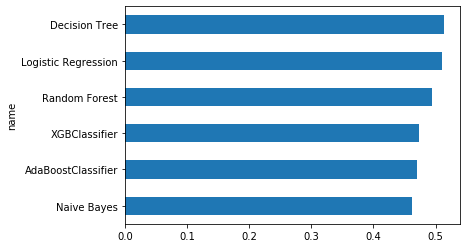

In [158]:
#columns=['name','accuracy']
df_acc=pd.DataFrame()#data=None,columns=columns)

for i in classifiers:
    
    #　該当分類器にて、学習
    classifier=classifiers[i]
    classifier.fit(trainX ,trainY)
 
    #　分類器の正答率を求める
    pre=classifier.predict(testX)
    ac_score=accuracy_score(testY,pre)
    print('分類器:{:} , 精度:{:.2%}'.format(i,ac_score))

    # 結果をデータフレームに入れる
    #s=pd.Series(data=[name,ac_score],index=columns)
    df_acc=df_acc.append({
        "name":i,
        "accuracy":ac_score
        },ignore_index=True)
    
    
    
    if ac_score>.5:
        from sklearn import metrics
        print("0.label_down",test[test.iloc[:,loc_resultdata]==0].shape[0])
        print("1.label_up  ",test[test.iloc[:,loc_resultdata]==1].shape[0])

        predict_y=classifier.predict(testX)
        print("confusion matrix:")
        print(metrics.confusion_matrix( testY,predict_y))
        print()
        print("classification report:")
        target_names = ['up','down']

        print(metrics.classification_report(testY,predict_y))
# データフレームの順番を分類器の精度順に表示
df_acc=df_acc.sort_values(by=['accuracy'],ascending=True)
# データフレームのラッパAPIからmatplotのapiをコールして、グラフを作成
df_acc.plot.barh(x='name',y='accuracy',legend=False)

# モデルの保存

In [161]:
df_acc[df_acc['accuracy']==df_acc['accuracy'].max()]['name'].values[0]

'Decision Tree'

In [162]:
classifier=classifiers[
#df_acc[df_acc['accuracy']==df_acc['accuracy'].max()].index[0]
df_acc[df_acc['accuracy']==df_acc['accuracy'].max()]['name'].values[0]
]
classifier.fit(trainX ,trainY)

# モデルを保存する
filename = 'model/sk-learn_model_20201107.sav'
pickle.dump(classifier, open(filename, 'wb'))

# ラベルデータ
#f = open('./model/predict_columns.txt', 'w')
#for x in predict_columns:
#    f.write(str(x) + "\n")
#f.close()

# テストデータ
test.to_pickle("data/df_test.pkl")

# confusion_matrix

In [176]:
# 買いとなったときの確率
test["predict_proba"]=classifier.predict_proba(testX)[:,1]


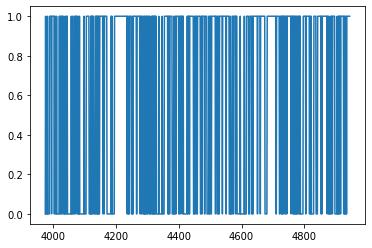

In [177]:
plt.plot(
test["predict_proba"]
)


In [178]:
l=0
for i,row in test.iterrows():
    # 買いになったとき
    #print(i)
    if row['predict_proba']>.5:
        if row['result_20day']==1:
            test.at[i, '正誤'] ="○"
        else:
            test.at[i, '正誤'] ="×"
            
    # 売りになったとき
    else:
        if row['result_20day']==0:
            test.at[i, '正誤'] ="○"
        else:
            test.at[i, '正誤'] ="×"


In [179]:
df_tmp=test[test['predict_proba']>.6]


df_tmp['正誤'].value_counts()

×    361
○    222
Name: 正誤, dtype: int64

In [180]:
dt_tmp=test[test['predict_proba']>.6]

In [181]:
test.shape

(972, 102)

In [172]:
dt_tmp

,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,...,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result_1day,result_3day,result_5day,result_10day,result_20day,result_30day,predict_proba,正誤
3975,2016-10-17,16871.839844,16900.119141,0.997856,0.721154,-0.307144,0.125273,-0.380666,-0.066808,-0.246901,0.500058,1.262371,1.846010,2.412163,1.599026,2.222659,2.934124,0.983936,0.668264,2.428326,2.856873,2.509910,2.176664,1.441669,0.639378,0.737269,-0.720999,-0.660387,-0.386961,-1.515801,-0.188949,-0.078888,0.083105,1.083575,1.447769,2.343198,1.759269,1.943352,1.945758,1.642122,1.893053,1.332918,1.660495,-0.040408,0.029343,-0.031639,1.034547,1.439537,2.487812,3.641808,...,2.441821,2.781119,3.130625,1.661165,2.092327,2.032131,1.297021,1.558665,0.098843,1.351120,1.563620,2.901423,3.876566,3.235880,5.704673,9.728832,10.080356,9.937116,9.312797,8.472396,7.477506,7.104364,8.686851,11.773197,11.342643,3.293584,4.803082,4.821319,6.273887,6.520465,7.932871,6.304620,6.790080,5.441154,3.387008,1.408444,0.775357,0.893106,1.325977,3.044706,1.640591,0.324548,0,0,0,0,0,0,1.0,×
3981,2016-10-25,17298.630859,17365.250000,1.001423,0.476694,0.086097,1.760487,2.039300,2.587548,2.529606,3.269002,2.214692,2.658047,2.139311,2.461108,2.276460,3.042313,3.823910,4.422312,5.002787,4.169081,4.808489,5.537952,3.538431,3.214774,5.019359,5.458746,5.103007,4.761331,4.007743,3.185157,3.285525,1.790368,1.852513,2.132856,0.975461,2.335877,2.448722,2.614813,3.640591,4.013997,4.932077,4.333377,4.522117,4.524584,4.213267,4.470546,3.896241,4.232105,2.488176,...,3.590322,4.005557,5.080349,6.263537,6.990767,6.602157,5.033195,5.381076,5.739423,4.232792,4.674861,4.613141,3.859436,4.127699,2.630949,3.914904,4.132779,5.504423,6.504234,5.847341,8.378585,12.504539,12.864955,12.718092,12.077979,11.216319,10.196263,9.813682,11.436200,14.600618,14.159173,5.906504,7.454187,7.472885,8.962197,9.215012,10.663147,8.993708,9.491448,8.108399,6.002291,3.973678,0,1,0,0,0,0,1.0,×
3988,2016-11-04,16964.500000,16905.359375,0.997326,-1.586611,-2.393706,-2.283239,-2.772484,-2.201557,-2.103576,-1.931545,-1.464059,-1.847111,-0.205063,0.068365,0.606023,0.549200,1.274315,0.240369,0.675161,0.166444,0.482025,0.300944,1.052005,1.818504,2.405348,2.974611,2.157008,2.784066,3.499439,1.538540,1.221134,2.990863,3.421763,3.072895,2.737818,1.998787,1.192089,1.290518,-0.175759,-0.114814,0.160114,-0.974925,0.359214,0.469879,0.632762,1.638727,2.004920,2.905267,2.318131,...,2.200340,2.452650,1.889439,2.218815,0.508570,0.578704,0.517387,1.589428,1.996643,3.050675,4.211009,4.924192,4.543089,3.004432,3.345593,3.697018,2.219488,2.653019,2.592491,1.853344,2.116425,0.648586,1.907741,2.121408,3.466557,4.447056,3.802851,6.285204,10.331463,10.684917,10.540891,9.913143,9.068126,8.067772,7.692581,9.283759,12.387055,11.954137,3.860872,5.378661,5.396997,6.857543,1,0,0,0,0,0,1.0,×
3989,2016-11-07,17126.029297,17177.210938,0.997765,0.952161,-0.649557,-1.464338,-1.352818,-1.846722,-1.270358,-1.171445,-0.997776,-0.525838,-0.912538,0.745145,1.021177,1.563954,1.506590,2.238609,1.194819,1.633750,1.120189,1.438775,1.255970,2.014182,2.787980,3.380412,3.955095,3.129707,3.762735,4.484920,2.505350,2.184922,3.971501,4.406504,4.054314,3.716048,2.969979,2.155601,2.254967,0.774728,0.836254,1.113799,-0.032048,1.314795,1.426514,1.590947,2.606491,2.976171,3.885090,...,3.481663,3.173452,3.428164,2.859590,3.192102,1.465573,1.536375,1.474474,2.556723,2.967815,4.031883,5.203265,5.923239,5.538507,3.985200,4.329609,4.68438